<a href="https://colab.research.google.com/github/mjavadpur/Regression/blob/main/RegressionSession2MJavadpur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This is the dataset of 100 patients to implement the machine learning algorithm 
and thereby interpreting results.

The data set consists of 100 observations and 10 variables (out of which 8 
numeric variables and one categorical variable and is ID) which are as follows:

Id
1.Radius

2.Texture

3.Perimeter

4.Area

5.Smoothness

6.Compactness

7.diagnosis_result(The labels correspond to the diagnosis_results column **B** or **M**, which I suppose mean **Begnin** and **Malignant**.)

8.Symmetry

9.Fractal dimension

# **Import Important python library**

In [3]:
!pip install pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.preprocessing import MinMaxScaler  
from sklearn.metrics import r2_score, mean_squared_error
# ,accuracy_score, plot_confusion_matrix

# **Import dataset**

In [82]:
df = pd.read_csv('/content/drive/MyDrive/Workshop/Regression/ProstateCancer/Prostate_Cancer.csv')
df

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...,...,...
95,96,M,23,16,132,1264,0.091,0.131,0.210,0.056
96,97,B,22,14,78,451,0.105,0.071,0.190,0.066
97,98,B,19,27,62,295,0.102,0.053,0.135,0.069
98,99,B,21,24,74,413,0.090,0.075,0.162,0.066


In [8]:
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


# **Get some information about dataset**

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis_result,100.0,0.62000,0.487832,0.000,0.0000,1.0000,1.000,1.000
radius,100.0,16.85000,4.879094,9.000,12.0000,17.0000,21.000,25.000
texture,100.0,18.23000,5.192954,11.000,14.0000,17.5000,22.250,27.000
perimeter,100.0,96.78000,23.676089,52.000,82.5000,94.0000,114.250,172.000
area,100.0,702.88000,319.710895,202.000,476.7500,644.0000,917.000,1878.000
smoothness,100.0,0.10273,0.014642,0.070,0.0935,0.1020,0.112,0.143
compactness,100.0,0.12670,0.061144,0.038,0.0805,0.1185,0.157,0.345
symmetry,100.0,0.19317,0.030785,0.135,0.1720,0.1900,0.209,0.304
fractal_dimension,100.0,0.06469,0.008151,0.053,0.0590,0.0630,0.069,0.097


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [11]:
df.columns

Index(['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')

In [12]:
df.shape

(100, 10)

### **Drop ID column**

In [83]:
df.drop(['id'], axis=1, inplace=True)
df.shape

(100, 9)

Replace Categorical data values with 0/1 (M = 1 & G = 0)

In [84]:
df.diagnosis_result = [1 if each == "M" else 0 for each in df.diagnosis_result]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diagnosis_result   100 non-null    int64  
 1   radius             100 non-null    int64  
 2   texture            100 non-null    int64  
 3   perimeter          100 non-null    int64  
 4   area               100 non-null    int64  
 5   smoothness         100 non-null    float64
 6   compactness        100 non-null    float64
 7   symmetry           100 non-null    float64
 8   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 7.2 KB


In [85]:
df.isnull().sum()

diagnosis_result     0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
dtype: int64

# **Scatter** **Report**

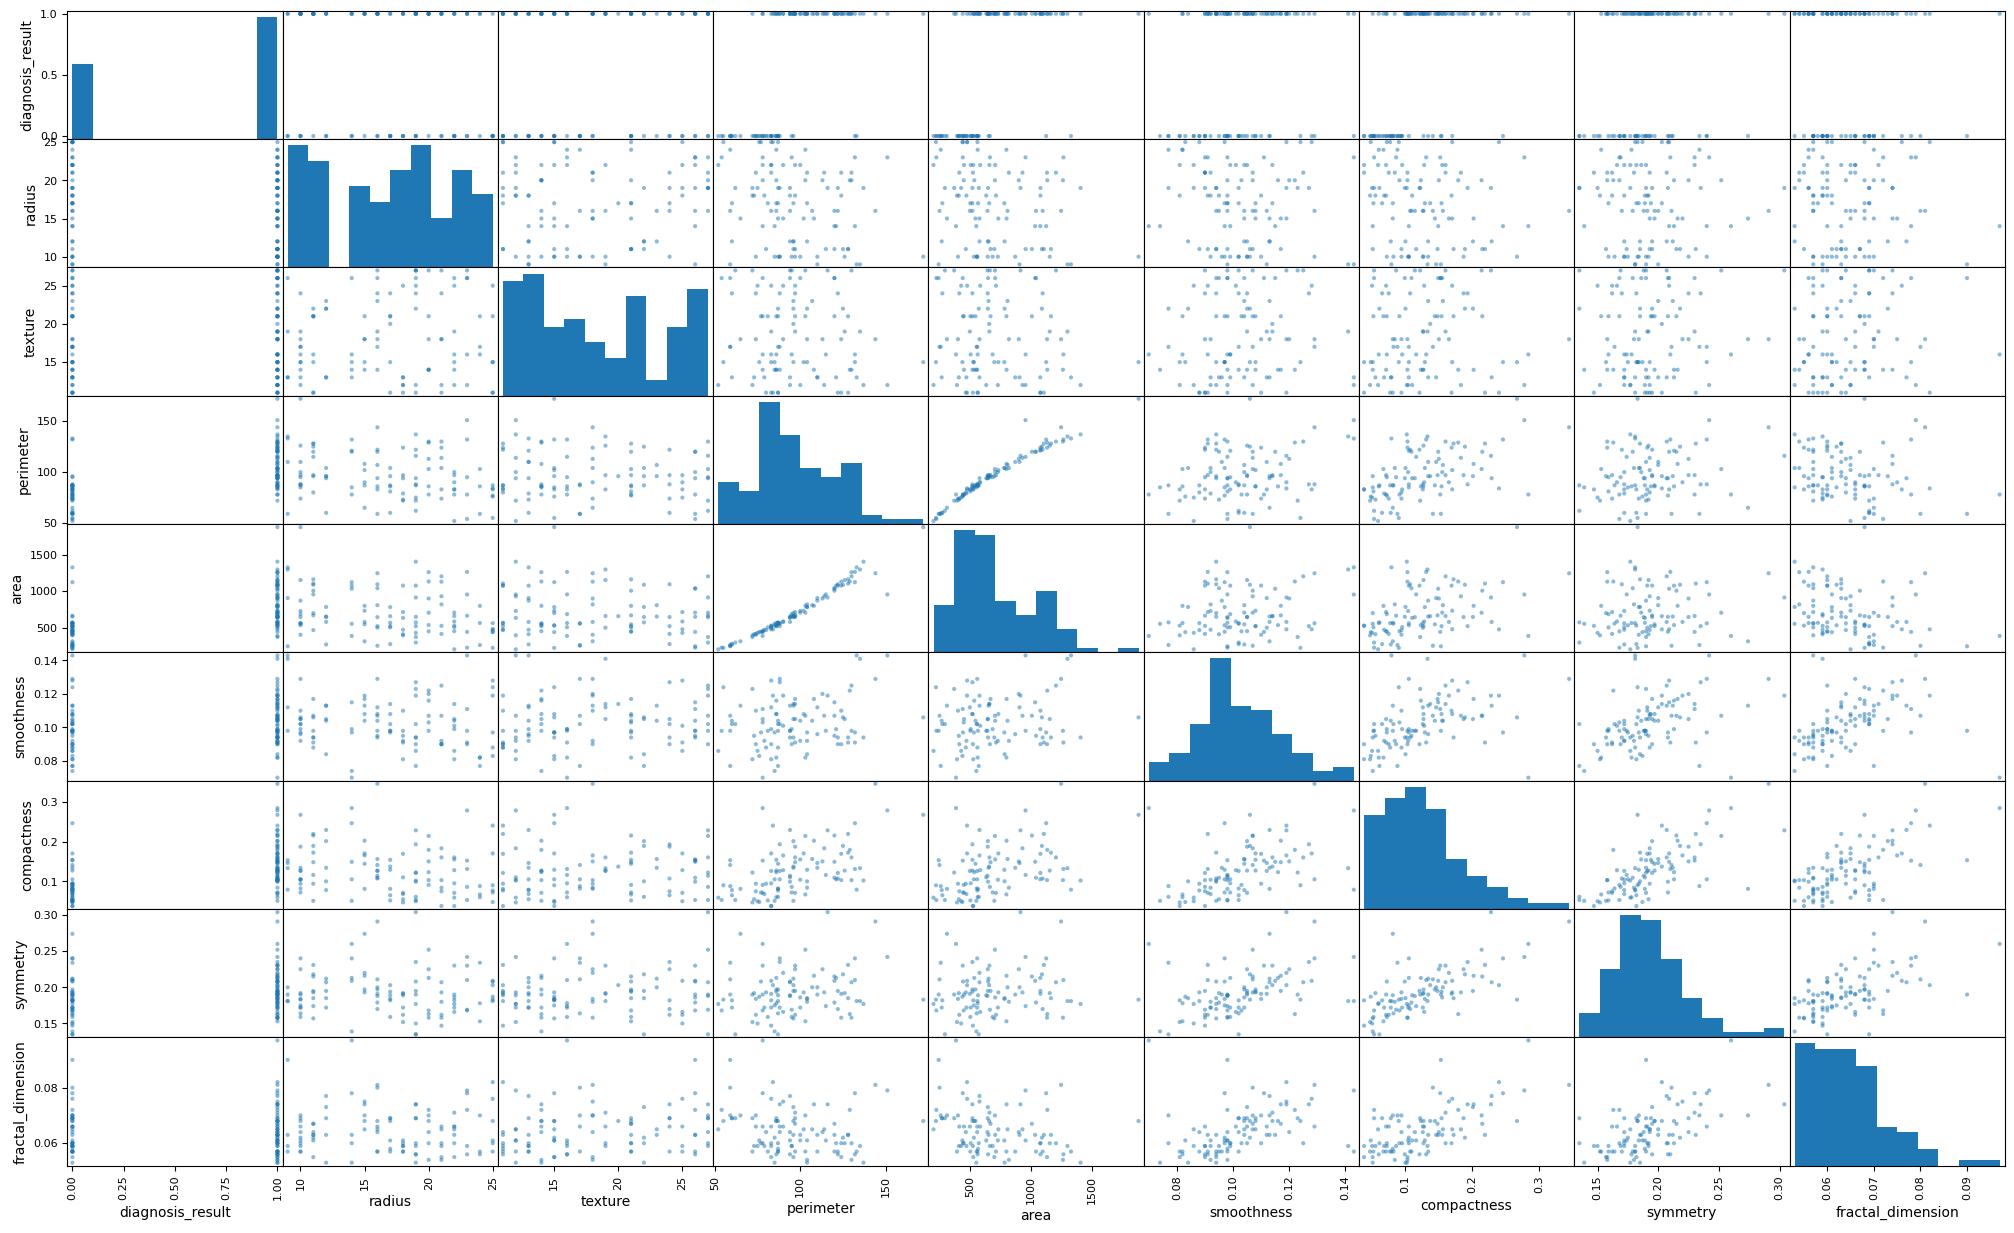

In [15]:
pd.plotting.scatter_matrix(df, figsize=(25,15), alpha=0.5)
plt.show()

# **Create Dirty Data**

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis_result,100.0,0.62000,0.487832,0.000,0.0000,1.0000,1.000,1.000
radius,100.0,16.85000,4.879094,9.000,12.0000,17.0000,21.000,25.000
texture,100.0,18.23000,5.192954,11.000,14.0000,17.5000,22.250,27.000
perimeter,100.0,96.78000,23.676089,52.000,82.5000,94.0000,114.250,172.000
area,100.0,702.88000,319.710895,202.000,476.7500,644.0000,917.000,1878.000
smoothness,100.0,0.10273,0.014642,0.070,0.0935,0.1020,0.112,0.143
compactness,100.0,0.12670,0.061144,0.038,0.0805,0.1185,0.157,0.345
symmetry,100.0,0.19317,0.030785,0.135,0.1720,0.1900,0.209,0.304
fractal_dimension,100.0,0.06469,0.008151,0.053,0.0590,0.0630,0.069,0.097


Create Null data

In [68]:
dirty_data = df.copy()

dirty_data["radius"][np.random.randint(0,len(dirty_data["radius"]),10).tolist()] = np.nan
dirty_data.isnull().sum()

<ipython-input-68-5b7b3ec7bf67>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dirty_data["radius"][np.random.randint(0,len(dirty_data["radius"]),10).tolist()] = np.nan


diagnosis_result      0
radius               18
texture               0
perimeter             0
area                  0
smoothness            0
compactness           0
symmetry              0
fractal_dimension     0
dtype: int64

#**Data** **Cleaning**

In [69]:
dirty_data["radius"]=dirty_data["radius"].replace(np.nan,dirty_data["radius"].mean())
dirty_data

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,23.0,12,151,954,0.143,0.278,0.242,0.079
1,0,9.0,13,133,1326,0.143,0.079,0.181,0.057
2,1,21.0,27,130,1203,0.125,0.160,0.207,0.060
3,1,14.0,16,78,386,0.070,0.284,0.260,0.097
4,1,9.0,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...,...
95,1,23.0,16,132,1264,0.091,0.131,0.210,0.056
96,0,22.0,14,78,451,0.105,0.071,0.190,0.066
97,0,19.0,27,62,295,0.102,0.053,0.135,0.069
98,0,21.0,24,74,413,0.090,0.075,0.162,0.066


In [70]:
df["area"]=df["area"].replace(0,df["area"].mean())
df

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,23.0,12,151,954,0.143,0.278,0.242,0.079
1,0,9.0,13,133,1326,0.143,0.079,0.181,0.057
2,1,21.0,27,130,1203,0.125,0.160,0.207,0.060
3,1,14.0,16,78,386,0.070,0.284,0.260,0.097
4,1,9.0,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...,...
95,1,23.0,16,132,1264,0.091,0.131,0.210,0.056
96,0,22.0,14,78,451,0.105,0.071,0.190,0.066
97,0,19.0,27,62,295,0.102,0.053,0.135,0.069
98,0,21.0,24,74,413,0.090,0.075,0.162,0.066


# **Data** **Visulization**

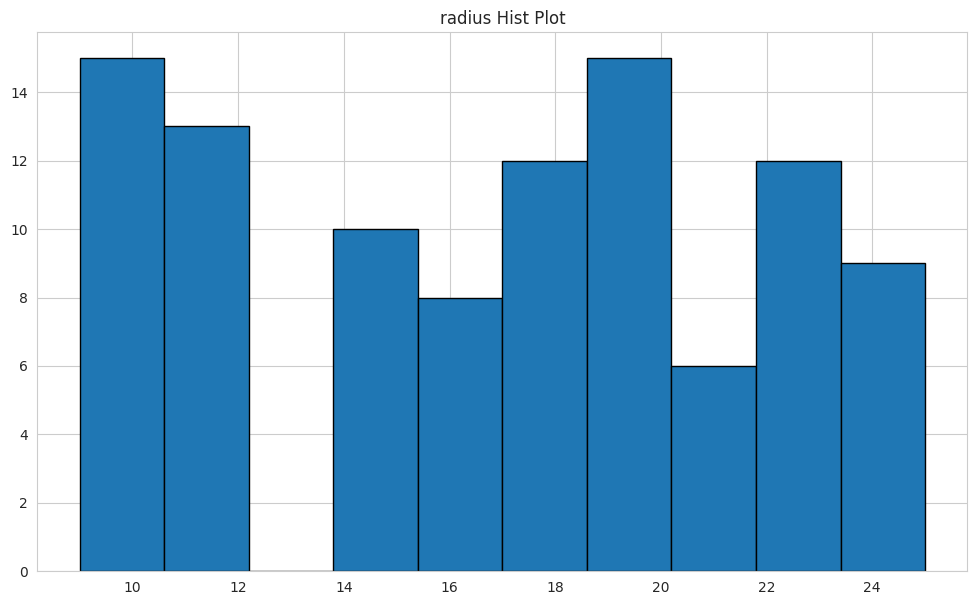

In [86]:
plt.figure(figsize=(12,7))
plt.hist("radius",data=df, edgecolor="k")
plt.title("radius Hist Plot")
plt.show()

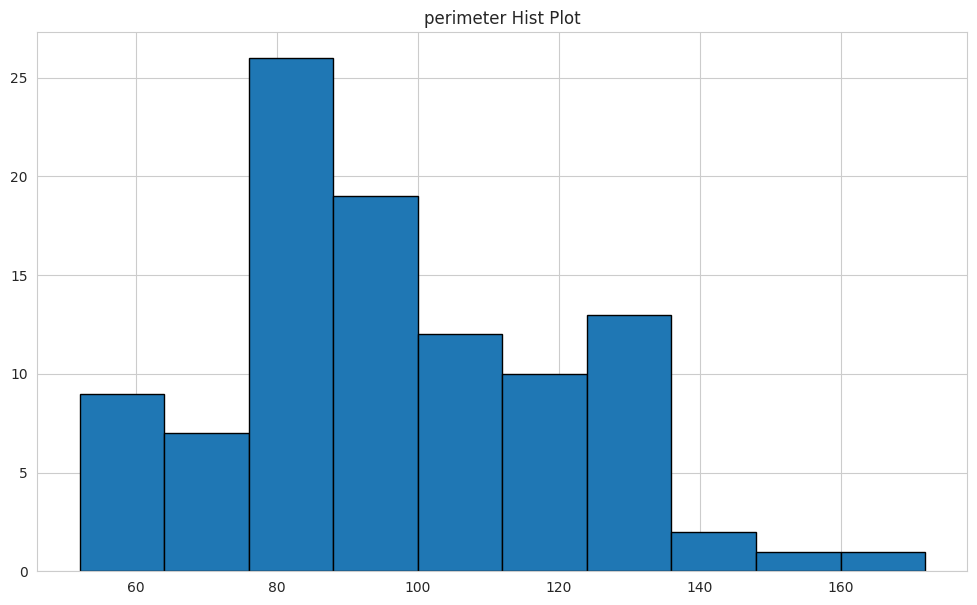

In [87]:
plt.figure(figsize=(12,7))
plt.hist("perimeter",data=df, edgecolor="k")
plt.title("perimeter Hist Plot")
plt.show()

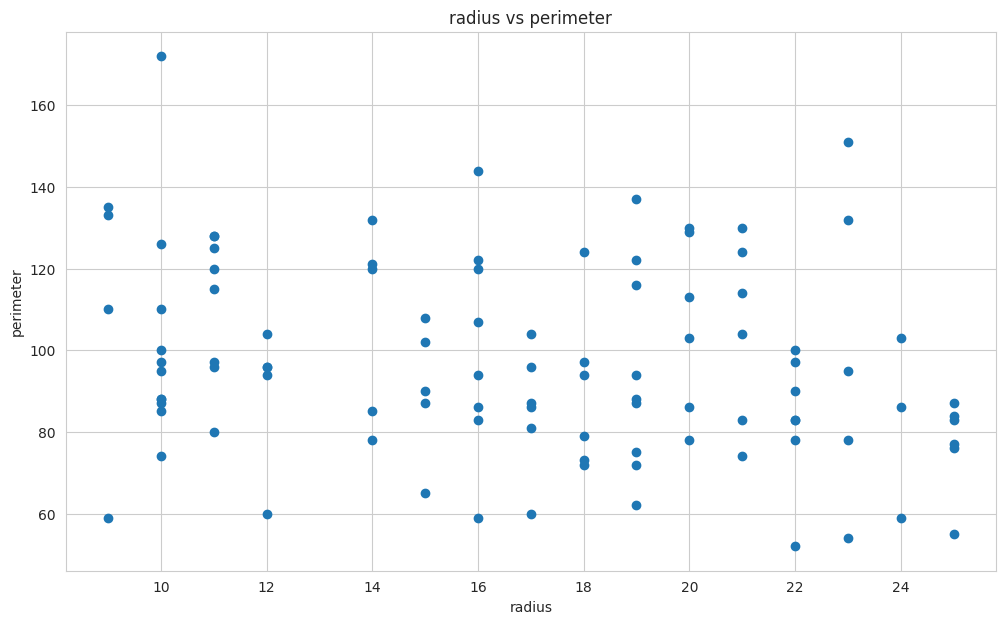

In [91]:
plt.figure(figsize=(12,7))
plt.scatter("radius","perimeter",data=df)
plt.title("radius vs perimeter")
plt.xlabel("radius")
plt.ylabel("perimeter")
plt.show()

<Axes: xlabel='radius', ylabel='perimeter'>

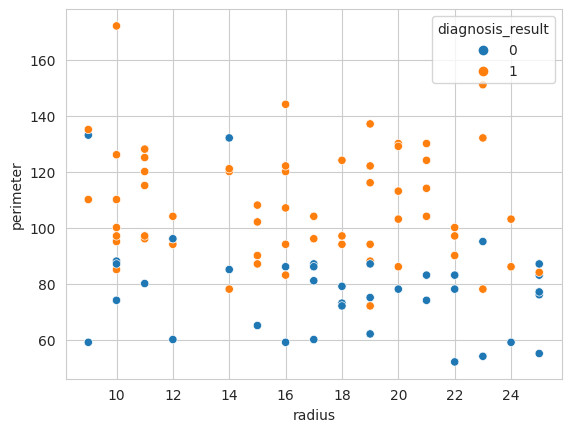

In [90]:
sns.scatterplot(data=df, x='radius', y='perimeter', hue='diagnosis_result')

<Axes: xlabel='diagnosis_result', ylabel='count'>

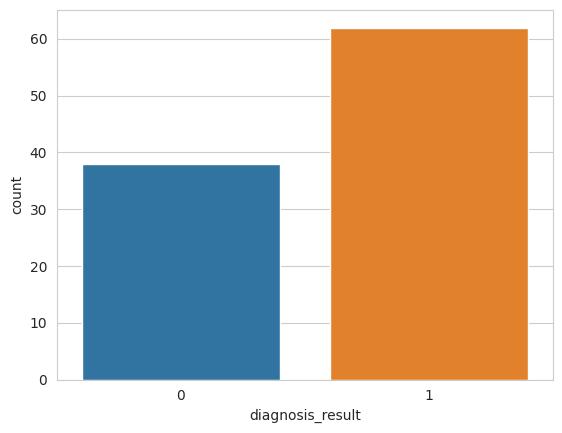

In [75]:
sns.set_style('whitegrid')
sns.countplot(x = 'diagnosis_result', data=df)

In [103]:
df.columns

Index(['diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')

<Axes: >

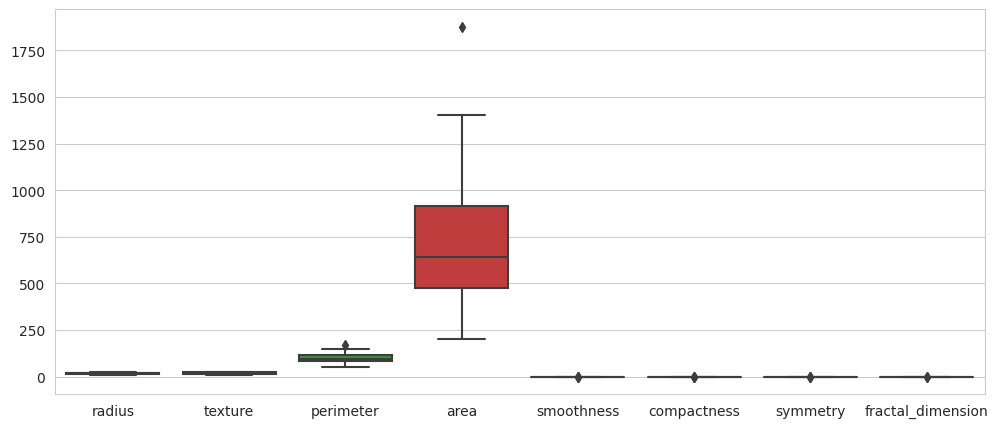

In [104]:
plt.figure(figsize = (12, 5))

sns.boxplot(df[['radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension']])

# **Correlation Report with heatmap visualization**

In [92]:
corr=df.corr()
corr


,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
diagnosis_result,1.000000,-0.176967,0.070735,0.607498,0.562444,0.197616,0.512234,0.233028,0.008180
radius,-0.176967,1.000000,0.100245,-0.238216,-0.250934,-0.127121,-0.191490,-0.039707,-0.029120
texture,0.070735,0.100245,1.000000,-0.113453,-0.113725,0.102321,0.032446,0.077912,0.139157
perimeter,0.607498,-0.238216,-0.113453,1.000000,0.976648,0.269442,0.527542,0.195539,-0.195434
area,0.562444,-0.250934,-0.113725,0.976648,1.000000,0.208438,0.424950,0.110435,-0.274344
smoothness,0.197616,-0.127121,0.102321,0.269442,0.208438,1.000000,0.465723,0.424203,0.369580
compactness,0.512234,-0.191490,0.032446,0.527542,0.424950,0.465723,1.000000,0.681123,0.647953
symmetry,0.233028,-0.039707,0.077912,0.195539,0.110435,0.424203,0.681123,1.000000,0.568608
fractal_dimension,0.008180,-0.029120,0.139157,-0.195434,-0.274344,0.369580,0.647953,0.568608,1.000000


#**Build** **Model**

In [93]:
y=df['diagnosis_result']
y.shape
y

0     1
1     0
2     1
3     1
4     1
     ..
95    1
96    0
97    0
98    0
99    1
Name: diagnosis_result, Length: 100, dtype: int64

In [94]:
X=df.drop(columns=['diagnosis_result'])
X

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,23,12,151,954,0.143,0.278,0.242,0.079
1,9,13,133,1326,0.143,0.079,0.181,0.057
2,21,27,130,1203,0.125,0.160,0.207,0.060
3,14,16,78,386,0.070,0.284,0.260,0.097
4,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...
95,23,16,132,1264,0.091,0.131,0.210,0.056
96,22,14,78,451,0.105,0.071,0.190,0.066
97,19,27,62,295,0.102,0.053,0.135,0.069
98,21,24,74,413,0.090,0.075,0.162,0.066


#**Split Data** **Set**

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state= 38)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(90, 8)
(90,)
(10, 8)
(10,)


In [119]:
X_train.isnull().sum()

radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
dtype: int64

In [120]:
model = LogisticRegression(random_state = 42,max_iter= 350)
model.fit(X_train, y_train)



LogisticRegression(max_iter=350, random_state=42)

In [121]:
model.score(X_train, y_train)

0.8666666666666667

In [122]:
model.score(X_test, y_test)

0.8

In [123]:
predict = model.predict(X_test)
predict

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 0])

In [124]:
Xtest = X_test.iloc[1]
Xtest

radius                22.000
texture               25.000
perimeter             90.000
area                 584.000
smoothness             0.101
compactness            0.128
symmetry               0.166
fractal_dimension      0.066
Name: 73, dtype: float64

In [125]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.71      0.83         7

    accuracy                           0.80        10
   macro avg       0.80      0.86      0.79        10
weighted avg       0.88      0.80      0.81        10

